In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud #just in case, regularly update your lucem_illud with the following code: pip install git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

# Exercise1

In [2]:
#corpus_name = "/Users/motoku/Homework-Notebooks/week-2/Movies" 
corpus_name = "/Users/motoku/Homework-Notebooks/week-2/News" 


In [3]:
def loadcorpus(corpus_name, corpus_style="text"):
    texts_raw = {}
    for file in os.listdir(corpus_name + "/"):
        if corpus_style in file:
            print(file)
            zfile = zipfile.ZipFile(corpus_name + "/" + file)
            for file in zfile.namelist():
                texts_raw[file] = []
                with zfile.open(file) as f:
                    for line in f:
                        texts_raw[file].append(line)
    #print(texts_raws)
    return texts_raw

In [4]:
#movie_raw = loadcorpus(corpus_name)
#print(movie_raw)
news_raw = loadcorpus(corpus_name)


text_newspaper_lsp.zip


In [12]:
news_raw.keys()

dict_keys(['w_news_1990.txt', 'w_news_1991.txt', 'w_news_1992.txt', 'w_news_1993.txt', 'w_news_1994.txt', 'w_news_1995.txt', 'w_news_1996.txt', 'w_news_1997.txt', 'w_news_1998.txt', 'w_news_1999.txt', 'w_news_2000.txt', 'w_news_2001.txt', 'w_news_2002.txt', 'w_news_2003.txt', 'w_news_2004.txt', 'w_news_2005.txt', 'w_news_2006.txt', 'w_news_2007.txt', 'w_news_2008.txt', 'w_news_2009.txt', 'w_news_2010.txt', 'w_news_2011.txt', 'w_news_2012.txt'])

In [150]:
print(news_raw['w_news_2002.txt'][1000])

b'##3039286 <p> Bearing lemon bars and chocolate-chip cookies , Rep. Nancy L. Johnson ( R-Conn. ) came to the municipal center here recently and urged voters to reelect a House member -- but not their current House member . <p> " I \'m very proud that I \'m one of the most senior members of Congress , " said Johnson , serving her 20th year in the House . " That gives Connecticut more power . " <p> In other words , she was saying , her incumbency is more valuable than that of Rep. James H. Maloney ( D-Conn. ) , who represents most of those attending the town hall meeting . <p> Johnson and Maloney belong to a small but unenviable congressional club that forms every 10 years : House members who face each other in reelection bids because of redistricting . While these intramural fights represent a fraction of the 435 House races , they are among the nation \'s most competitive and bitterly contested . <p> These races can not be waged with the typical House campaign strategy , in which one 

In [41]:
def clean_raw_text(raw_texts):
    clean_texts = []
    for text in raw_texts:
        try:
            text = text.decode("utf-8")
            clean_text = text.replace('<p>','').replace(" \'m", "'m").replace(" \'ll", "'ll").replace(" \'re", "'re").replace(" \'s", "'s").replace(" \'re", "'re").replace(" n\'t", "n't").replace(" \'ve", "'ve").replace(" /'d", "'d")
            clean_texts.append(clean_text)
        except AttributeError:
            # print("ERROR CLEANING")
            # print(text)
            continue
        except UnicodeDecodeError:
            # print("Unicode Error, Skip")
            continue
    return clean_texts

In [42]:
clean_news_2002 = clean_raw_text(news_raw['w_news_2002.txt']) #total of 2291 news 



In [121]:
clean_news_2003 = clean_raw_text(news_raw['w_news_2003.txt'])

In [44]:
def wordCooccurrence(sentences, makeMatrix = False):
    words = set()
    for sent in sentences:
        words |= set(sent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in sentences:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        return g
    

In [45]:
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

In [47]:
nlp = spacy.load("en")


In [49]:
word_tokenize(clean_news_2002[1])

['3000780',
 'When',
 'word',
 'went',
 'around',
 'that',
 'there',
 'were',
 'temporary',
 'jobs',
 'available',
 'for',
 'the',
 'Olympics',
 'rootless',
 'people',
 'drifted',
 'into',
 'Utah',
 'from',
 'all',
 'over',
 'the',
 'West',
 'Some',
 'found',
 'work',
 'cleaning',
 'toilets',
 'others',
 'found',
 'work',
 'selling',
 'their',
 'plasma',
 'for',
 '$',
 '20',
 'Broke',
 'they',
 'have',
 'made',
 'their',
 'way',
 'to',
 'skid',
 'row',
 'which',
 'in',
 'the',
 'Western',
 'tradition',
 'is',
 'situated',
 'near',
 'the',
 'railroad',
 'tracks',
 'Yet',
 'unlike',
 'the',
 'tracks',
 'in',
 'most',
 'Western',
 'cities',
 'the',
 'ones',
 'in',
 'Salt',
 'Lake',
 'City',
 'run',
 'near',
 'the',
 'heart',
 'of',
 'downtown',
 'Hundreds',
 'of',
 'thousands',
 'of',
 'well',
 'fed',
 'tourists',
 'are',
 'separated',
 'from',
 'a',
 'few',
 'thousand',
 'ragamuffins',
 'by',
 'an',
 'imaginary',
 'fence',
 'called',
 'Rio',
 'Grande',
 'Street',
 'On',
 'a',
 'normal',


In [50]:
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)



In [51]:
countedWords = wordCounter(word_tokenize(clean_news_2002[1]))
countedWords[:10]

,word,count
0,3000780,1
1,when,8
2,word,1
3,went,3
4,around,6
5,that,9
6,there,12
7,were,5
8,temporary,1
9,jobs,1


In [53]:
countedWords.sort_values('count', ascending=False, inplace=True)
countedWords[:100]

,word,count
12,the,97
104,and,44
70,a,38
39,to,32
61,of,30
...,...,...
140,police,3
71,few,3
184,ago,3
338,goodman,3


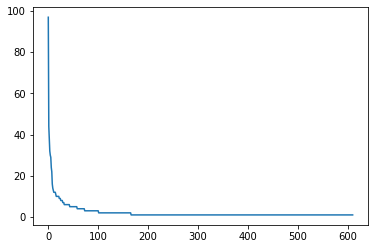

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
plt.show()

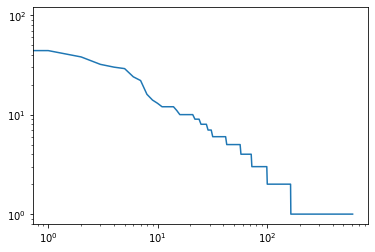

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

In [70]:
print(clean_news_2002[1])

##3000780  When word went around that there were temporary jobs available for the Olympics , rootless people drifted into Utah from all over the West . Some found work cleaning toilets ; others found work selling their plasma for $20 .  Broke , they have made their way to skid row , which , in the Western tradition , is situated near the railroad tracks . Yet unlike the tracks in most Western cities , the ones in Salt Lake City run near the heart of downtown . Hundreds of thousands of well-fed tourists are separated from a few thousand ragamuffins by an imaginary fence called Rio Grande Street .  On a normal winter day , the homeless population in Salt Lake City hovers around 2,000 people . But with the Olympics in town , those who house the homeless estimate the current number to be about 3,000 .  Some people came for the rumors of work , and some arrived by freight train looking for a sandwich . Others were evicted from their inexpensive motel rooms and apartments because the owners 

In [63]:
import nltk

In [90]:
NewsToken_All = []
for i in range(0,200):
    tokens = word_tokenize(clean_news_2002[i])
    NewsToken_All.extend(tokens)

In [122]:
NewsTokens = NewsToken_All #should be all

#NewsTokens = word_tokenize(clean_news_2002[1]) #should be all
NewsText = nltk.Text(NewsTokens)
NewsIndex = nltk.text.ConcordanceIndex(NewsText) 
NewsIndex.print_concordance('immigrant')

Displaying 17 of 17 matches:
ng rae Lee about a Korean American immigrant who spies on a corrupt Korean Amer
example called the resonance of an immigrant 's experience overrated adding It 
1648 Juan Lafuente a laconic Cuban immigrant lived in the shadow of his promine
in the Bronx and Gerta an Albanian immigrant at Grover Cleveland High School in
her grit effervescence and classic immigrant 's story Gerta told Ms. Mukherjee 
e bureaucracy of death say lawyers immigrant groups and consular officials And 
anizations have denied lawyers and immigrant groups said The National Associati
ne of the lawyers working free for immigrant families affected by the terrorist
They include plans to reach out to immigrant groups and possibly to close paris
the psychic journey being taken in immigrant communities across Western Europe 
ther way in a poignant kink in the immigrant arc they have often deemed immater
 It is a disorienting image Muslim immigrant parents defending their children o
ints at the

In [89]:
#print(NewsTokens[:5])

['3000780', 'When', 'word', 'went', 'around']


In [123]:
NewsText.common_contexts(['immigrant'])

american_who an_'s cuban_lived albanian_at classic_'s lawyers_groups
and_groups for_families to_groups in_communities the_arc
muslim_parents this_second anti_bigotry anti_message automatic_status
german_charles


In [125]:
NewsText.count('immigrant')

17

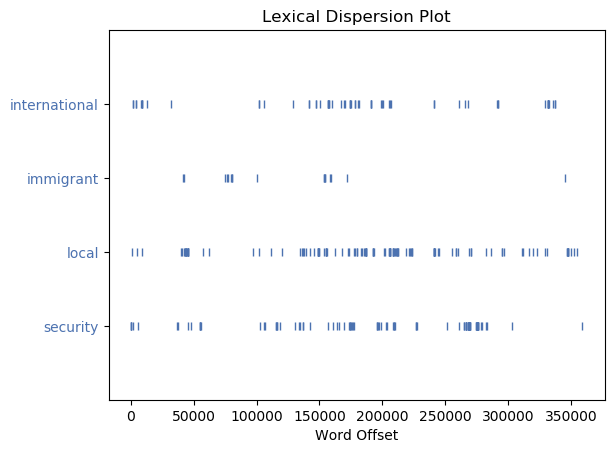

In [92]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
NewsText.dispersion_plot(['international','immigrant', 'local', 'security' ])
sns.set() #Re-enabling seaborn

In [ ]:
#To make a pandasdataframe

In [97]:
#corpus_Dir = "/Users/motoku/Homework-Notebooks/week-2/News" 
#Change this to your own directory of texts


#Potentially, this should include year(1990-2012), but not sure my computer can handle this




def MakeFiles(target, maxFiles = 50):
    #We are setting a max so our examples don't take too long to run
    #For converting to a DataFrame
    releasesDict = {
        'name' : [], #The name of the file
        'text' : [], #The text of the file, watch out for binary files
        
    }

    for text in range(len(target[:maxFiles])):
        #These are provided by the directory
        releasesDict['name'].append('2002')
        releasesDict['text'].append(clean_news_2002[text])
    return pandas.DataFrame(releasesDict)
NewsRelease=MakeFiles(clean_news_2002)
NewsRelease['tokenized_text'] = NewsRelease['text'].apply(lambda x: word_tokenize(x))





    
    
    

In [126]:
NewsRelease3=MakeFiles(clean_news_2003)
NewsRelease3['tokenized_text'] = NewsRelease3['text'].apply(lambda x: word_tokenize(x))
NewsRelease3['word_counts'] = NewsRelease3['tokenized_text'].apply(lambda x: len(x))

In [159]:
len(clean_news_2003)

2252

In [160]:
NewsRelease2003=MakeFiles(clean_news_2003,2252)
NewsRelease2003['tokenized_text'] = NewsRelease2003['text'].apply(lambda x: word_tokenize(x))
NewsRelease2003['word_counts'] = NewsRelease2003['tokenized_text'].apply(lambda x: len(x))

In [168]:
NewsRelease2003['name'] = '2003'

In [170]:
NewsRelease2003.to_csv('/Users/motoku/Homework-Notebooks/data/NewsRelease2003Full.csv')

In [165]:
NewsRelease2003Sample10per = NewsRelease2003.sample(frac = 0.1, axis = 0)

In [166]:
NewsRelease2003Sample10per[:5]

,name,text,tokenized_text,word_counts
1813,2002,##3056692 The Northwest Flyers Track Club jus...,"[3056692, The, Northwest, Flyers, Track, Club,...",1533
598,2002,##3019903 A capsule look at 20 top players in...,"[3019903, A, capsule, look, at, 20, top, playe...",1580
308,2002,##3017298 Easter is the most celebrated holid...,"[3017298, Easter, is, the, most, celebrated, h...",1386
2011,2002,##3063156 Who would have thought that small-t...,"[3063156, Who, would, have, thought, that, sma...",1317
852,2002,##3034616 When the United States last appeare...,"[3034616, When, the, United, States, last, app...",1257


In [167]:
NewsRelease2003Sample10per.to_csv('/Users/motoku/Homework-Notebooks/data/NewsReleaseSample10p.csv')

In [156]:
NewsRelease3.to_csv('/Users/motoku/Homework-Notebooks/data/NewsReleaseSample2003.csv')

In [157]:
NewsRelease2003SmallSample = NewsRelease3.sample(frac = 0.1, axis = 0)

In [158]:
NewsRelease2003SmallSample

,name,text,tokenized_text,word_counts
48,2003,"##3001650 In his telephone calls to Mexico , ...","[3001650, In, his, telephone, calls, to, Mexic...",1547
32,2003,##3001633 Andrew M. Cuomo has served as a mem...,"[3001633, Andrew, M., Cuomo, has, served, as, ...",1786
28,2003,##3000847 When Hideki Matsui takes the field ...,"[3000847, When, Hideki, Matsui, takes, the, fi...",1350
6,2003,##3000795 Picabo Street pines for the old day...,"[3000795, Picabo, Street, pines, for, the, old...",1381
12,2003,##3000810 While major league baseball teams c...,"[3000810, While, major, league, baseball, team...",1816


In [131]:
len(clean_news_2002)

2291

In [132]:
NewsRelease2002=MakeFiles(clean_news_2002,2291)
NewsRelease2002['tokenized_text'] = NewsRelease2002['text'].apply(lambda x: word_tokenize(x))
NewsRelease2002['word_counts'] = NewsRelease2002['tokenized_text'].apply(lambda x: len(x))

In [133]:
NewsRelease2002[:5]

,name,text,tokenized_text,word_counts
0,2002,\r\n,[],0
1,2002,##3000780 When word went around that there we...,"[3000780, When, word, went, around, that, ther...",1418
2,2002,"##3000784 In 1994 , running against the post-...","[3000784, In, 1994, running, against, the, pos...",1170
3,2002,##3000786 Joe Torre will meet with his coache...,"[3000786, Joe, Torre, will, meet, with, his, c...",1266
4,2002,##3000790 They do things the old way in this ...,"[3000790, They, do, things, the, old, way, in,...",1181


In [134]:
NewsRelease2002['word_counts'] = NewsRelease2002['tokenized_text'].apply(lambda x: len(x))

In [98]:
NewsRelease['word_counts'] = NewsRelease['tokenized_text'].apply(lambda x: len(x))

In [99]:
NewsRelease[:5]

,name,text,tokenized_text,word_counts
0,2002,\r\n,[],0
1,2002,##3000780 When word went around that there we...,"[3000780, When, word, went, around, that, ther...",1418
2,2002,"##3000784 In 1994 , running against the post-...","[3000784, In, 1994, running, against, the, pos...",1170
3,2002,##3000786 Joe Torre will meet with his coache...,"[3000786, Joe, Torre, will, meet, with, his, c...",1266
4,2002,##3000790 They do things the old way in this ...,"[3000790, They, do, things, the, old, way, in,...",1181


# Exercise2

In [101]:
def normalizeTokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized

In [102]:
NewsRelease['normalized_tokens'] = NewsRelease['tokenized_text'].apply(lambda x: normalizeTokens(x))

NewsRelease['normalized_tokens_count'] = NewsRelease['normalized_tokens'].apply(lambda x: len(x))

NewsRelease

,name,text,tokenized_text,word_counts,normalized_tokens,normalized_tokens_count
0,2002,\r\n,[],0,[],0
1,2002,##3000780 When word went around that there we...,"[3000780, When, word, went, around, that, ther...",1418,"[word, go, temporary, job, available, olympics...",681
2,2002,"##3000784 In 1994 , running against the post-...","[3000784, In, 1994, running, against, the, pos...",1170,"[run, post, palm, beach, ted, kennedy, seat, u...",532
3,2002,##3000786 Joe Torre will meet with his coache...,"[3000786, Joe, Torre, will, meet, with, his, c...",1266,"[joe, torre, meet, coach, legends, field, tues...",546
4,2002,##3000790 They do things the old way in this ...,"[3000790, They, do, things, the, old, way, in,...",1181,"[thing, old, way, dust, choke, corner, state, ...",584
5,2002,##3000792 The clock struck midnight and Chris...,"[3000792, The, clock, struck, midnight, and, C...",1735,"[clock, strike, midnight, christmas, arrive, s...",828
6,2002,##3000795 Picabo Street pines for the old day...,"[3000795, Picabo, Street, pines, for, the, old...",1381,"[picabo, street, pine, old, day, ski, long, st...",695
7,2002,##3000800 Eighteen years ago G. PEPPE PINTON ...,"[3000800, Eighteen, years, ago, G., PEPPE, PIN...",1295,"[year, ago, g., peppe, pinton, turn, light, co...",680
8,2002,##3000802 To admirers of its flowing simplici...,"[3000802, To, admirers, of, its, flowing, simp...",1339,"[admirer, flow, simplicity, soccer, know, beau...",656
9,2002,##3000804 The worst are getting worse . The ...,"[3000804, The, worst, are, getting, worse, The...",1485,"[bad, get, bad, major, league, bad, team, seas...",634


NameError: name 'normalized_tokens' is not defined

In [135]:
NewsRelease2002['normalized_tokens'] = NewsRelease2002['tokenized_text'].apply(lambda x: normalizeTokens(x))
NewsRelease2002['normalized_tokens_count'] = NewsRelease2002['normalized_tokens'].apply(lambda x: len(x))


In [136]:
NewsRelease2002.to_csv('/Users/motoku/Homework-Notebooks/data/NewsReleaseSample2002Full.csv')

In [103]:
#.sum() adds together the lists from each row into a single list
News_whcfdist = nltk.ConditionalFreqDist(((len(w), w) for w in NewsRelease['normalized_tokens'].sum()))

#print the number of words
print(News_whcfdist.N())

45825


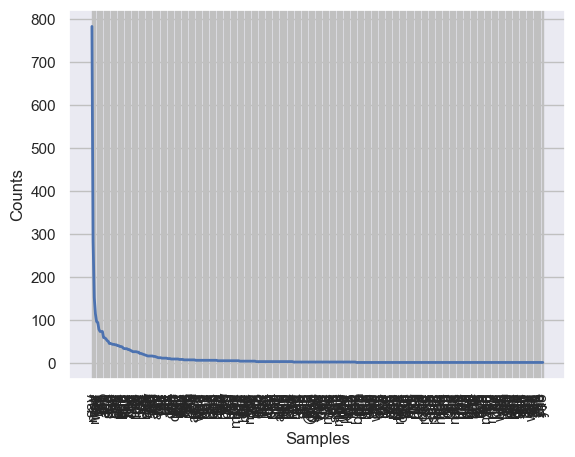

In [104]:
News_whcfdist[3].plot()

In [105]:
News_whcfdist = nltk.ConditionalProbDist(News_whcfdist, nltk.ELEProbDist)

#print the most common 2 letter word
print(News_whcfdist[2].max())

#And its probability
print(News_whcfdist[2].prob(News_whcfdist[2].max()))

mr
0.2246376811594203


In [106]:
def spacy_pos(word_list):
    tags = []
    doc = nlp(word_list.lower())
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags

In [107]:
NewsRelease['normalized_tokens_POS'] = [spacy_pos(t) for t in NewsRelease['text']]

In [108]:
whcfdist_WordtoPOS = nltk.ConditionalFreqDist(NewsRelease['normalized_tokens_POS'].sum())
list(whcfdist_WordtoPOS.items())[:10]

[('\r\n', FreqDist({'_SP': 50})),
 ('#', FreqDist({'$': 84, 'NN': 14})),
 ('3000780', FreqDist({'CD': 1})),
 (' ', FreqDist({'_SP': 4586})),
 ('when', FreqDist({'WRB': 254})),
 ('word', FreqDist({'NN': 11})),
 ('went', FreqDist({'VBD': 35})),
 ('around', FreqDist({'IN': 37, 'RB': 15, 'RP': 8})),
 ('that', FreqDist({'IN': 441, 'DT': 270, 'WDT': 240, 'RB': 4})),
 ('there', FreqDist({'EX': 155, 'RB': 55}))]

In [109]:
whcfdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in NewsRelease['normalized_tokens_POS'].sum())

In [110]:
whcfdist_POStoWord['JJ']

FreqDist({'last': 163, 'other': 114, 'new': 111, 'first': 106, 'many': 95, 'good': 73, 'old': 58, 'general': 58, 'few': 46, 'little': 46, ...})

In [111]:
whcfdist_POStoWord['NN'].most_common(5)

[('time', 165), ('year', 143), ('team', 131), ('day', 93), ('money', 91)]

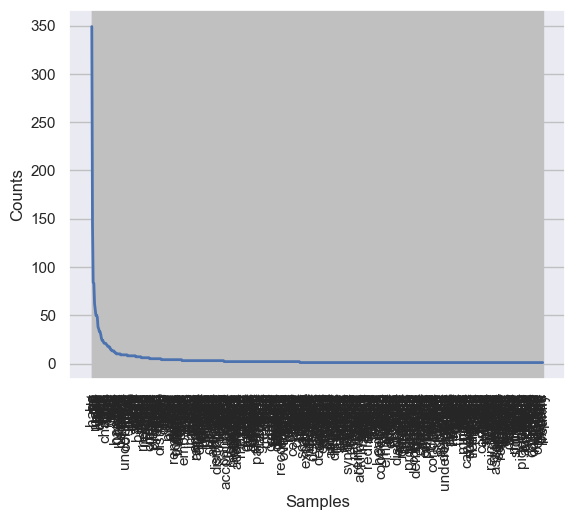

In [112]:
whcfdist_POStoWord['VB'].plot()

In [113]:
whcpdist_POStoWord = nltk.ConditionalProbDist(whcfdist_POStoWord, nltk.ELEProbDist)

#print the most common nouns
print(whcpdist_POStoWord['NN'].max())

#And its probability
print(whcpdist_POStoWord['NN'].prob(whcpdist_POStoWord['NN'].max()))

time
0.011548391598632336


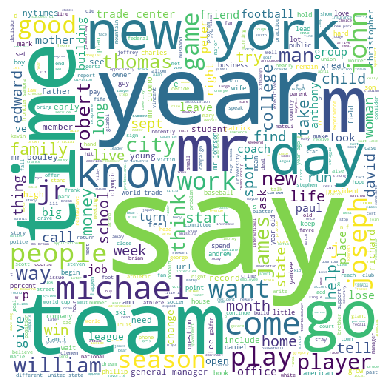

In [115]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(NewsRelease['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("2002News_word_cloud.pdf", format = 'pdf')

#  I guess people doesn't really care about immigrants in news and mostly the news are focused on player, daily work and life. Although it's just a small segment of 2002 news(the first 200), I guess we may see more about terrorist and immigrants later

# POS

In [ ]:
def tag_sents_pos(sentences):
    """
    function which replicates NLTK pos tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for token in sent:
            pos_sent.append((token.text, token.tag_))
        pos_sents.append(pos_sent)
    
    return pos_sents

# Collocation

In [137]:
News2002Bigrams = nltk.collocations.BigramCollocationFinder.from_words(NewsRelease['normalized_tokens'].sum())

In [138]:
print("There are {} bigrams in the finder".format(News2002Bigrams.N))

There are 45825 bigrams in the finder


In [139]:
def bigramScoring(count, wordsTuple, total):
    return count

print(News2002Bigrams.nbest(bigramScoring, 10))

[('new', 'york'), ('trade', 'center'), ('general', 'manager'), ('http', '//www.nytimes.com'), ('mr', 'bouley'), ('mr', 'cuomo'), ('url', 'http'), ('world', 'trade'), ('mr', 'johnson'), ('united', 'states')]


In [142]:
NewsRelease[:-2]

,name,text,tokenized_text,word_counts,normalized_tokens,normalized_tokens_count,normalized_tokens_POS
0,2002,\r\n,[],0,[],0,"[(\r\n, _SP)]"
1,2002,##3000780 When word went around that there we...,"[3000780, When, word, went, around, that, ther...",1418,"[word, go, temporary, job, available, olympics...",681,"[(#, $), (#, $), (3000780, CD), ( , _SP), (whe..."
2,2002,"##3000784 In 1994 , running against the post-...","[3000784, In, 1994, running, against, the, pos...",1170,"[run, post, palm, beach, ted, kennedy, seat, u...",532,"[(#, NN), (#, $), (3000784, CD), ( , _SP), (in..."
3,2002,##3000786 Joe Torre will meet with his coache...,"[3000786, Joe, Torre, will, meet, with, his, c...",1266,"[joe, torre, meet, coach, legends, field, tues...",546,"[(#, $), (#, $), (3000786, CD), ( , _SP), (joe..."
4,2002,##3000790 They do things the old way in this ...,"[3000790, They, do, things, the, old, way, in,...",1181,"[thing, old, way, dust, choke, corner, state, ...",584,"[(#, $), (#, $), (3000790, CD), ( , _SP), (the..."
5,2002,##3000792 The clock struck midnight and Chris...,"[3000792, The, clock, struck, midnight, and, C...",1735,"[clock, strike, midnight, christmas, arrive, s...",828,"[(#, $), (#, $), (3000792, CD), ( , _SP), (the..."
6,2002,##3000795 Picabo Street pines for the old day...,"[3000795, Picabo, Street, pines, for, the, old...",1381,"[picabo, street, pine, old, day, ski, long, st...",695,"[(#, $), (#, $), (3000795, CD), ( , _SP), (pic..."
7,2002,##3000800 Eighteen years ago G. PEPPE PINTON ...,"[3000800, Eighteen, years, ago, G., PEPPE, PIN...",1295,"[year, ago, g., peppe, pinton, turn, light, co...",680,"[(#, $), (#, $), (3000800, CD), ( , _SP), (eig..."
8,2002,##3000802 To admirers of its flowing simplici...,"[3000802, To, admirers, of, its, flowing, simp...",1339,"[admirer, flow, simplicity, soccer, know, beau...",656,"[(#, $), (#, $), (3000802, CD), ( , _SP), (to,..."
9,2002,##3000804 The worst are getting worse . The ...,"[3000804, The, worst, are, getting, worse, The...",1485,"[bad, get, bad, major, league, bad, team, seas...",634,"[(#, $), (#, $), (3000804, CD), ( , _SP), (the..."


In [143]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
News2002Bigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]

[(('new', 'york'), 1529.7807955244853),
 (('trade', 'center'), 784.9198622327051),
 (('http', '//www.nytimes.com'), 717.4377610016621),
 (('url', 'http'), 703.6534437421359),
 (('general', 'manager'), 618.1044387406245),
 (('united', 'states'), 465.79395805205974),
 (('world', 'trade'), 412.33783083725694),
 (('mr', 'cuomo'), 407.42986479040997),
 (('mr', 'bouley'), 377.0490139786515),
 (('title', 'ix'), 345.4224013553265),
 (('world', 'cup'), 343.41885994439417),
 (('mr', 'johnson'), 337.6413663884206),
 (('salt', 'lake'), 318.2498862887056),
 (('cave', 'dog'), 268.99219863740154),
 (('global', 'crossing'), 230.56308875180565),
 (('ms', 'brown'), 229.40964964012272),
 (('year', 'ago'), 227.3810733547517),
 (('mr', 'bonanno'), 194.79812557962046),
 (('vice', 'president'), 190.50540302031774),
 (('los', 'angeles'), 188.5978172205731),
 (('free', 'agent'), 186.9619498963738),
 (('lake', 'city'), 169.69914986716088),
 (('red', 'cross'), 164.70521203106833),
 (('devil', 'ray'), 161.2036563

In [144]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
NewsTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(NewsRelease['normalized_tokens'].sum())
NewsTrigrams.score_ngrams(trigram_measures.student_t)[:20]

[(('url', 'http', '//www.nytimes.com'), 6.708197026015541),
 (('world', 'trade', 'center'), 6.5573804310298325),
 (('new', 'york', 'city'), 4.999389562309945),
 (('salt', 'lake', 'city'), 4.12309674251468),
 (('mr', 'johnson', 'say'), 3.870825129079465),
 (('mr', 'cuomo', 'say'), 3.7397700698557643),
 (('new', 'york', 'state'), 2.6451896808597497),
 (('attack', 'world', 'trade'), 2.4494169046050116),
 (('general', 'manager', 'year'), 2.4492096466253632),
 (('chief', 'operating', 'officer'), 2.2360672133781745),
 (('//www.nytimes.com', 'correction', 'date'), 2.2360662759023247),
 (('new', 'york', 'times'), 2.236014096703566),
 (('mr', 'bouley', 'say'), 2.2321364836225133),
 (('hundred', 'million', 'dollar'), 1.9999996595125613),
 (('ratio', 'male', 'female'), 1.9999996533218807),
 (('ms', 'dowouna', 'nortey'), 1.9999993987896625),
 (('male', 'female', 'athlete'), 1.999998266609403),
 (('senior', 'vice', 'president'), 1.999997486583634),
 (('http', '//www.nytimes.com', 'correction'), 1.9